-------------------------------------------------------
# **Question 8:  ESTIMATING COUNTS** (10 points)
-------------------------------------------------------

## Description

A company has manufactured certain objects and has printed a serial number on each manufactured object. The serial numbers start at 1 and end at $N$, where $N$ is the number of objects that have been manufactured. One of these objects is selected at random, and the serial number of that object is 808. 

## Questions

a. Assume that $N$ is equally likely to be any number between 1 and 1000. Compute the posterior distribution for the value of $N$. 

b. Find the maximum a posteriori (MAP) estimate of $N$. Plot the obtained value in the same plot as the posterior distribution found in part a.

c. Find the minimum mean squared error (MMSE) estimate of $N$. 

d. Next, assume that $N$ is equally likely to be any number between 1 and 2000. Compute the posterior distribution for the value of $N$. Find the MMSE estimate of $N$. 

e. Construct 80%, 90%, and 97% credible interval for the MSE estimates you found in part d. Illustrate the obtained interval using the CDF of the corresponding posterior distribution.

## Answer

### Part a

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint

In [2]:
# Function to calculate likelihood
def likelihood(max_N, data):
    '''Returns the likelihood of seeing a particular locomotive number (data)
       when the company has max_n locomotives in all'''
    lval = pd.DataFrame(index = np.arange(1, max_N + 1))
    lval['likelihoods'] = 1 / np.arange(1, max_N + 1)
    lval['likelihoods'][lval.index < data] = 0
    return lval['likelihoods']

In [3]:
# Function to update distribution
def update(distribution, likelihood):
    '''Our standard Bayesian update function'''
    distribution['probs'] = distribution['probs'] * likelihood
    prob_data = distribution['probs'].sum()
    distribution['probs'] = distribution['probs'] / prob_data
    return distribution

In [4]:
max_N = 1000
N_dist = pd.DataFrame(index = np.arange(1, max_N + 1))
N_dist['probs'] = randint(1, max_N + 1).pmf(np.arange(1, max_N + 1)) 
N_dist = update(N_dist, likelihood(max_N, 808))

/var/folders/25/168v0ykd6_s9y04_8_rzxs0000dp62/T/ipykernel_97392/1565346990.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  lval['likelihoods'][lval.index < data] = 0


### Part b

In [5]:
map_estimate = N_dist['probs'].idxmax()
map_estimate

808

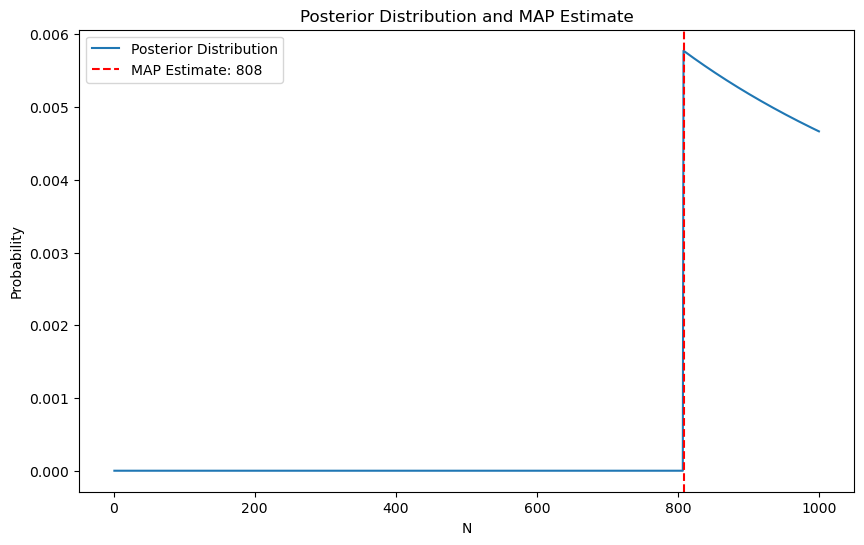

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(N_dist.index, N_dist['probs'], label='Posterior Distribution')
plt.axvline(map_estimate, color='r', linestyle='--', label=f'MAP Estimate: {map_estimate}')
plt.xlabel('N')
plt.ylabel('Probability')
plt.title('Posterior Distribution and MAP Estimate')
plt.legend()
plt.show()

### Part c

In [7]:
mmse_estimate_1000 = np.sum(N_dist.index * N_dist['probs'])
mmse_estimate_1000

900.5558763436075

### Part d

In [8]:
max_N = 2000
N_dist = pd.DataFrame(index = np.arange(1, max_N + 1))
N_dist['probs'] = randint(1, max_N + 1).pmf(np.arange(1, max_N + 1)) 
N_dist = update(N_dist, likelihood(max_N, 808))
mmse_estimate_2000 = np.sum(N_dist.index * N_dist['probs'])
mmse_estimate_2000

/var/folders/25/168v0ykd6_s9y04_8_rzxs0000dp62/T/ipykernel_97392/1565346990.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  lval['likelihoods'][lval.index < data] = 0


1315.0217640834358

### Part e

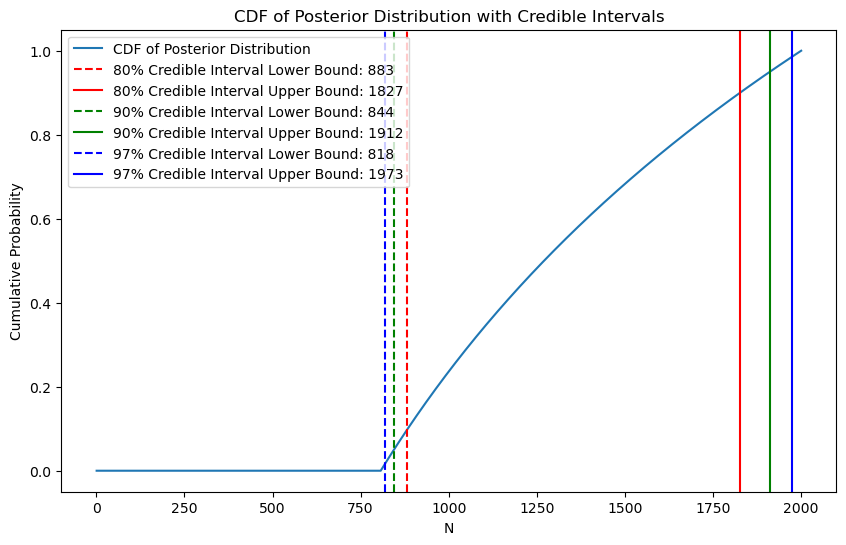

MMSE estimate for N between 1 and 1000: 900.5558763436075
MMSE estimate for N between 1 and 2000: 1315.0217640834358
Credible intervals for the MSE estimates found in part d: {0.8: (883, 1827), 0.9: (844, 1912), 0.97: (818, 1973)}


In [15]:
N_dist['cdf'] = np.cumsum(N_dist['probs'])
credible_intervals = [0.80, 0.90, 0.97]
intervals = {}

for ci in credible_intervals:
    lower_bound = max(N_dist.index[N_dist['cdf'] <= (1 - ci) / 2])
    upper_bound = min(N_dist.index[N_dist['cdf'] > (1 + ci) / 2])
    intervals[ci] = (lower_bound, upper_bound)

plt.figure(figsize=(10, 6))
plt.plot(N_dist.index, N_dist['cdf'], label='CDF of Posterior Distribution')

colors = ['r', 'g', 'b']
for i, ci in enumerate(credible_intervals):
    plt.axvline(intervals[ci][0], color=colors[i], linestyle='--', label=f'{int(ci*100)}% Credible Interval Lower Bound: {intervals[ci][0]}')
    plt.axvline(intervals[ci][1], color=colors[i], linestyle='-', label=f'{int(ci*100)}% Credible Interval Upper Bound: {intervals[ci][1]}')

plt.xlabel('N')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Posterior Distribution with Credible Intervals')
plt.legend()
plt.show()

print(f"MMSE estimate for N between 1 and 1000: {mmse_estimate_1000}")
print(f"MMSE estimate for N between 1 and 2000: {mmse_estimate_2000}")
print(f"Credible intervals for the MSE estimates found in part d: {intervals}")
